In [1]:
import cv2
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np   

In [2]:
categories = ['Dog', 'Cat','Person']
model = tf.keras.models.load_model('final.model')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 158, 158, 16)      448       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 156, 156, 16)      2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 78, 78, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 76, 76, 32)        4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 74, 74, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 35, 35, 64)        18496     
__________

In [3]:
def predict(filepath):
    size = 160
    img_array = cv2.imread(filepath)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (size,size))
    choices = model.predict([new_array.reshape(-1, size,size,3)])
    prediction = np.argmax(choices)
    print('This is an image of a:' + ' ' + categories[prediction])
    print(choices[0][prediction])
    plt.imshow(RGB_img)

This is an image of a: Cat
0.9974606


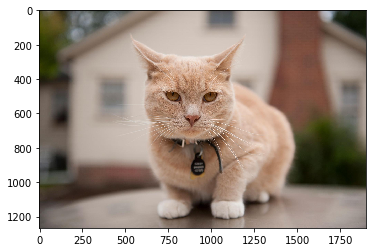

In [4]:
predict('cat.jpg')

This is an image of a: Dog
1.0


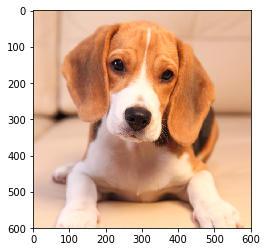

In [5]:
predict('dog.jpg')

This is an image of a: Person
0.99375063


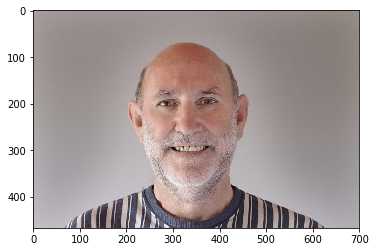

In [6]:
predict('person.jpg')

This is an image of a: Person
0.7335383


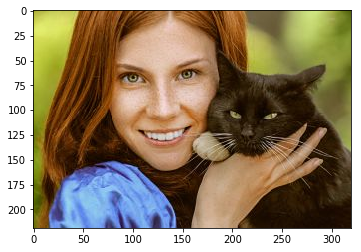

In [7]:
predict('test.jpg')

This is an image of a: Cat
0.70987


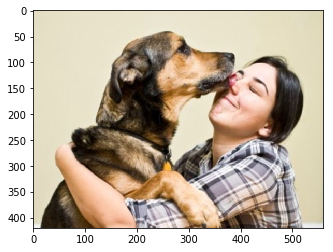

In [8]:
predict('test2.jpg')

This is an image of a: Person
0.74929994


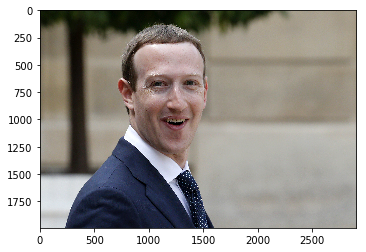

In [9]:
predict('person2.jpg')

This is an image of a: Person
0.99997985


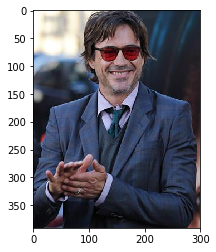

In [10]:
predict('applauding_241.jpg')

This is an image of a: Person
0.80784833


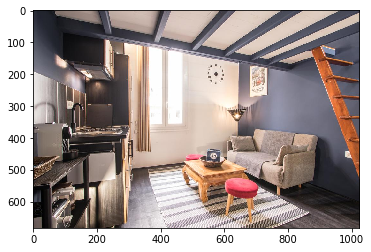

In [11]:
predict('studio.jpg')